# 1 Generation of linearly-separable data

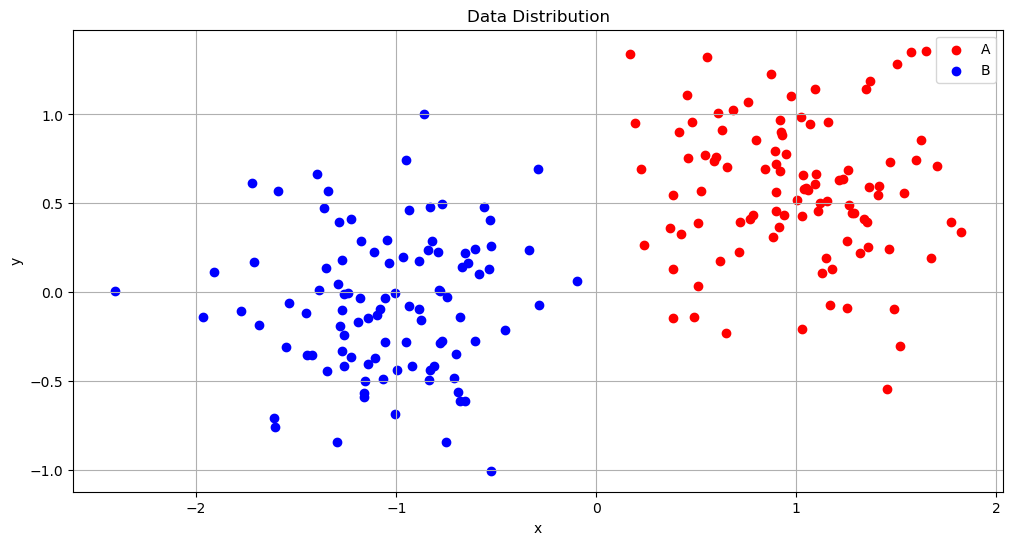

In [1]:
import numpy as np
import  matplotlib.pyplot as plt

#parameters
n = 100
mA = np.array([1.0, 0.5])
mB = np.array([-1.0, 0.0])
sigmaA = 0.4
sigmaB = 0.4

#generate data
ClassA = np.random.randn(2,n)*sigmaA + mA.reshape(2,1)  #2*n matrix
ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1)  #2*n matrix

#plot data
plt.figure(figsize=(12, 6))
plt.scatter(ClassA[0, :], ClassA[1, :], c='r', label='A')
plt.scatter(ClassB[0, :], ClassB[1, :], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()



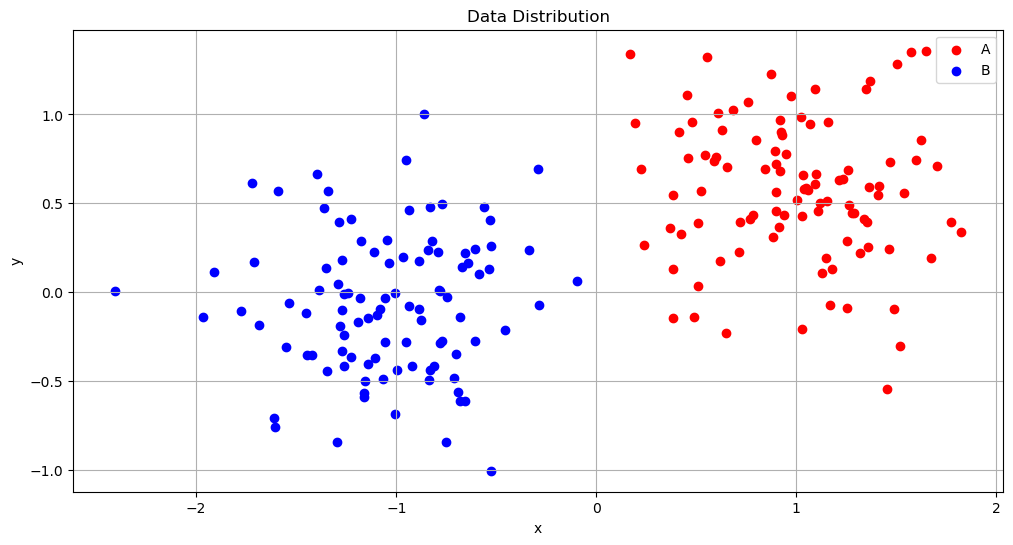

In [2]:
#shuffle 
#lest assume 1 for class A and -1 for B
labels = np.concatenate((np.ones(n), -np.ones(n))).reshape(1,2*n)
classtotal  = np.concatenate((ClassA,ClassB),axis=1)
data = np.concatenate((classtotal,labels),axis=0)
indices = np.random.permutation(data.shape[1]) 
shuffled_data = data[:, indices]
classtotal = shuffled_data[:2, :]  
labels = shuffled_data[2, :]  

#plot just to test
plt.figure(figsize=(12, 6))
indice1 = labels == 1
indice2 = labels == -1
plt.scatter(classtotal[0, indice1], classtotal[1, indice1], c='r', label='A')
plt.scatter(classtotal[0, indice2], classtotal[1, indice2], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()

# 2 Classification with a single-layer perceptron and analysis

In [3]:
data = np.concatenate((classtotal,np.ones(2*n).reshape(1,2*n)),axis = 0)
data.shape

(3, 200)

In [4]:

def initial_weights(input_size, theta=0.03):
    weights = np.random.normal(scale=theta, size=input_size)
    return weights

def MSE(weights,data,labels):
    predict = np.dot(weights,data)
    error = labels - predict
    return np.mean(error**2)

def mis_ratio(weights,data,labels):
    predict = np.dot(weights, data)
    predicted_labels = np.sign(predict)
    error_ratio = 1-np.sum(predicted_labels==labels)/len(labels)
    return error_ratio

def perceptron_model_iteration(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])  # add bias to data before the function
    Errorlist = []
    for i in range(epoch):
        data_point = data[:, i % len(labels)]
        label = labels[i % len(labels)]
        predict = np.dot(weights, data_point)
        if predict * label <= 0:  # using 1/-1 rather than 1/0 for easy coding
            weights += learning_rate * label * data_point
        #Errorlist.append(MSE(weights, data, labels))
        Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist

def delta_model_online_iteration(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])
    Errorlist = []
    for i in range(epoch):
        data_point = data[:, i % len(labels)]
        label = labels[i % len(labels)]
        error = label - np.dot(weights, data_point)
        weights += learning_rate * error * data_point
        #Errorlist.append(MSE(weights, data, labels))
        Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist


def perceptron_model_epoch(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])  # add bias to data before the function
    Errorlist = []
    for i in range(epoch):
        for j in range(len(labels)):
            data_point = data[:, j]
            label = labels[j]
            predict = np.dot(weights, data_point)
            if predict * label <= 0:  # using 1/-1 rather than 1/0 for easy coding
                weights += learning_rate * label * data_point
        Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist

def delta_model_online_epoch(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])
    Errorlist = []
    for i in range(epoch):
        for j in range(len(labels)):
            data_point = data[:, j]
            label = labels[j]
            error = label - np.dot(weights, data_point)
            weights += learning_rate * error * data_point
        Errorlist.append(mis_ratio(weights, data, labels))
    return weights, Errorlist


def delta_model_batch(data, labels, epoch, learning_rate=0.001):
    weights = initial_weights(data.shape[0])
    Errorlist =[]
    for i in range(epoch):
        predict = np.dot(weights,data)
        error = labels - predict
        weights += learning_rate * np.dot(error,data.T)
        Errorlist.append(mis_ratio(weights,data,labels))
    return weights,Errorlist

## 2.1 compare perceptron learning with the delta learning rule in online (sequential) mode

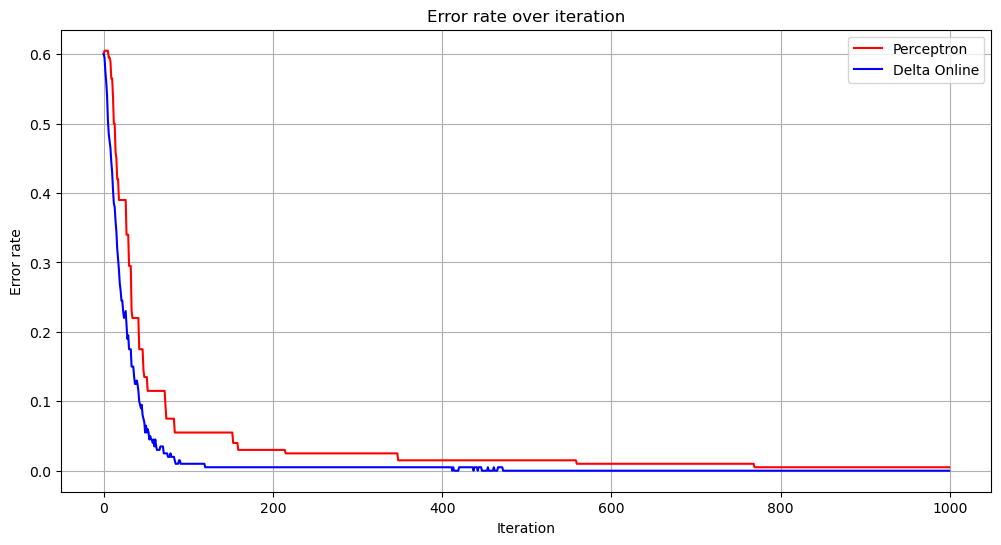

In [5]:
#parameters
epoch = 1000
learning_rate = 0.001

weights1, mse_perceptron_list = perceptron_model_iteration(data, labels, epoch, learning_rate)
weights2, mse_delta_online_list = delta_model_online_iteration(data, labels, epoch, learning_rate)


plt.figure(figsize=(12,6))
plt.plot(range(epoch), mse_perceptron_list, label='Perceptron', c="r")
plt.plot(range(epoch), mse_delta_online_list, label='Delta Online', c="b")
plt.xlabel('Iteration')
plt.ylabel('Error rate')
plt.title('Error rate over iteration')
plt.legend()
plt.grid(True)
plt.show()


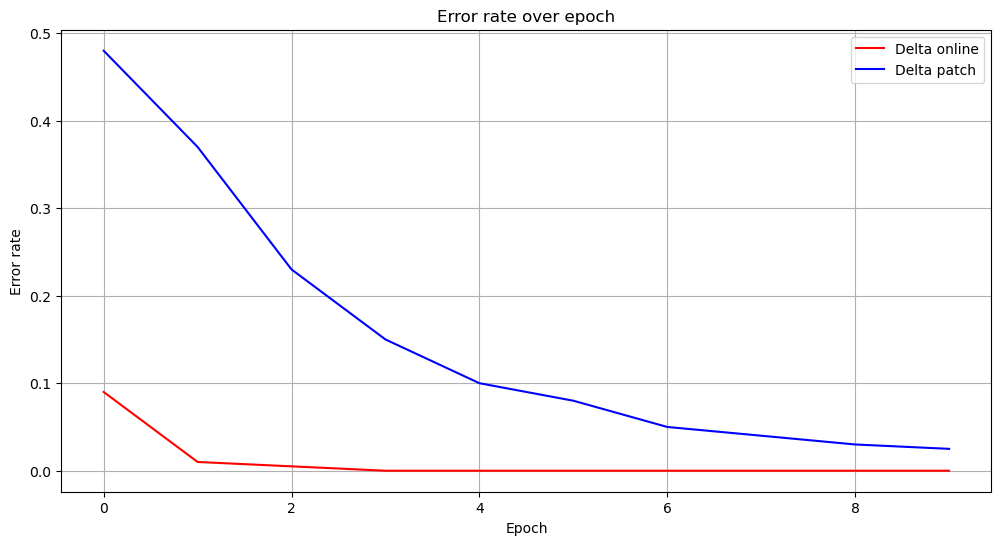

In [6]:
n = 10
learning_rate = 0.0001
weights3, errorrate_deltaonline_list_epoch = delta_model_online_epoch(data, labels, n,learning_rate)
weights4, errorrate_deltapatch_list_epoch = delta_model_batch(data, labels, n,learning_rate)


plt.figure(figsize=(12,6))
plt.plot(range(n), errorrate_deltaonline_list_epoch, label='Delta online', c="r")
plt.plot(range(n), errorrate_deltapatch_list_epoch, label='Delta patch', c="b")
plt.xlabel('Epoch')
plt.ylabel('Error rate')
plt.title('Error rate over epoch')
plt.legend()
plt.grid(True)
plt.show()

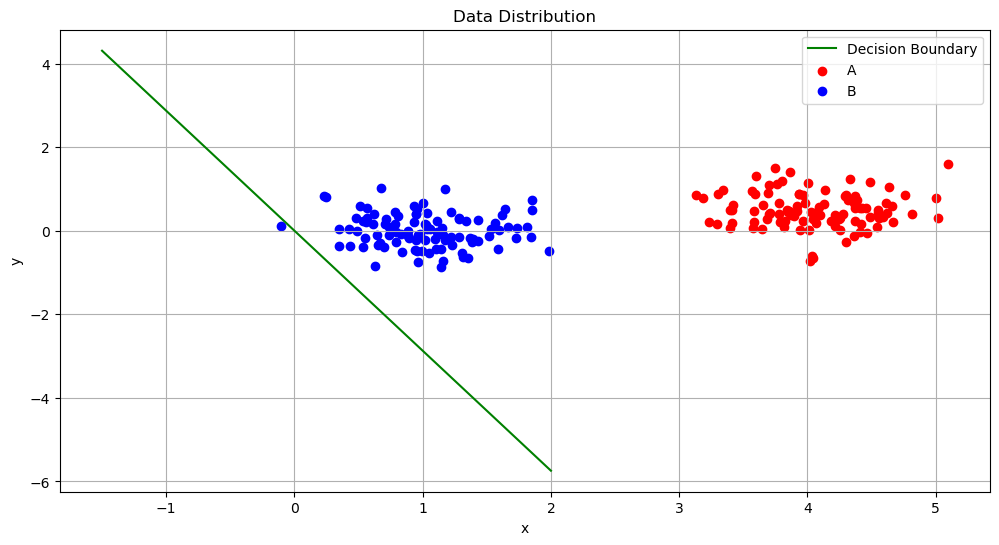

In [7]:
#parameters
n = 100
mA = np.array([4.0, 0.5])
mB = np.array([1.0, 0.0])
sigmaA = 0.4
sigmaB = 0.4
#generate data
ClassA = np.random.randn(2,n)*sigmaA + mA.reshape(2,1)  #2*n matrix
ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1)  #2*n matrix
labels = np.concatenate((np.ones(n), -np.ones(n))).reshape(1,2*n)
classtotal  = np.concatenate((ClassA,ClassB),axis=1)
data = np.concatenate((classtotal,labels),axis=0)
indices = np.random.permutation(data.shape[1]) 
shuffled_data = data[:, indices]
classtotal = shuffled_data[:2, :]  
labels = shuffled_data[2, :]  
n = 10
learning_rate = 0.0001
weights3, errorrate_deltaonline_list_epoch = delta_model_online_epoch(classtotal, labels, n,learning_rate)


#plot data
plt.figure(figsize=(12, 6))
x = np.linspace(-1.5, 2, 100)
y = -weights3[0] * x / weights3[1] 
plt.plot(x, y, color='g', label='Decision Boundary')
plt.scatter(ClassA[0, :], ClassA[1, :], c='r', label='A')
plt.scatter(ClassB[0, :], ClassB[1, :], c='b', label='B')
plt.title("Data Distribution")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.grid(True)
plt.show()


# 3 Classification of samples that are not linearly separable

In [8]:
def generate_data(n=100, mA=np.array([1.0, 0.3]), mB=np.array([0.0, -0.1]), sigmaA=0.2, sigmaB=0.3):
    half_n = round(0.5 * n)
    classA_x = np.concatenate((np.random.randn(1, half_n) * sigmaA - mA[0],
                                np.random.randn(1, half_n) * sigmaA + mA[0]), axis=1)
    classA_y = np.random.randn(1, n)*sigmaA + mA[1]
    ClassA = np.concatenate((classA_x, classA_y), axis=0)
    ClassB = np.random.randn(2,n)*sigmaB + mB.reshape(2,1) 
    labels = np.concatenate((np.ones(n), -np.ones(n)))
    classtotal = np.concatenate((ClassA, ClassB), axis=1)
    data = np.concatenate((classtotal,np.ones(2*n).reshape(1,2*n)),axis = 0)
    return data, labels

data, labels = generate_data()


In [9]:
def calculate_accuracy(weights, data, labels):
    predict = np.dot(weights, data)
    predicted_labels = np.sign(predict)
    classA_denominator = np.sum(labels == 1)
    if classA_denominator > 0:
        classA_accuracy = np.sum((predicted_labels == labels) & (labels == 1)) / classA_denominator
    else:
        classA_accuracy = 0  
    classB_denominator = np.sum(labels == -1)
    if classB_denominator > 0:
        classB_accuracy = np.sum((predicted_labels == labels) & (labels == -1)) / classB_denominator
    else:
        classB_accuracy = 0 
    return classA_accuracy, classB_accuracy



def delta_model_batch_accuracy(data, labels, epoch, learning_rate=0.001, dataT=data, labelsT=labels):
    weights = initial_weights(data.shape[0])
    Alist =[]
    Blist = []
    for i in range(epoch):
        predict = np.dot(weights,data)
        error = labels - predict
        weights += learning_rate * np.dot(error,data.T)
        A_accuracy,B_accuracy = calculate_accuracy(weights,dataT,labelsT)
        Alist.append(A_accuracy)
        Blist.append(B_accuracy)
    return weights,Alist,Blist

In [10]:
#parameters

epoch = 100
learning_rate = 0.001

## full data

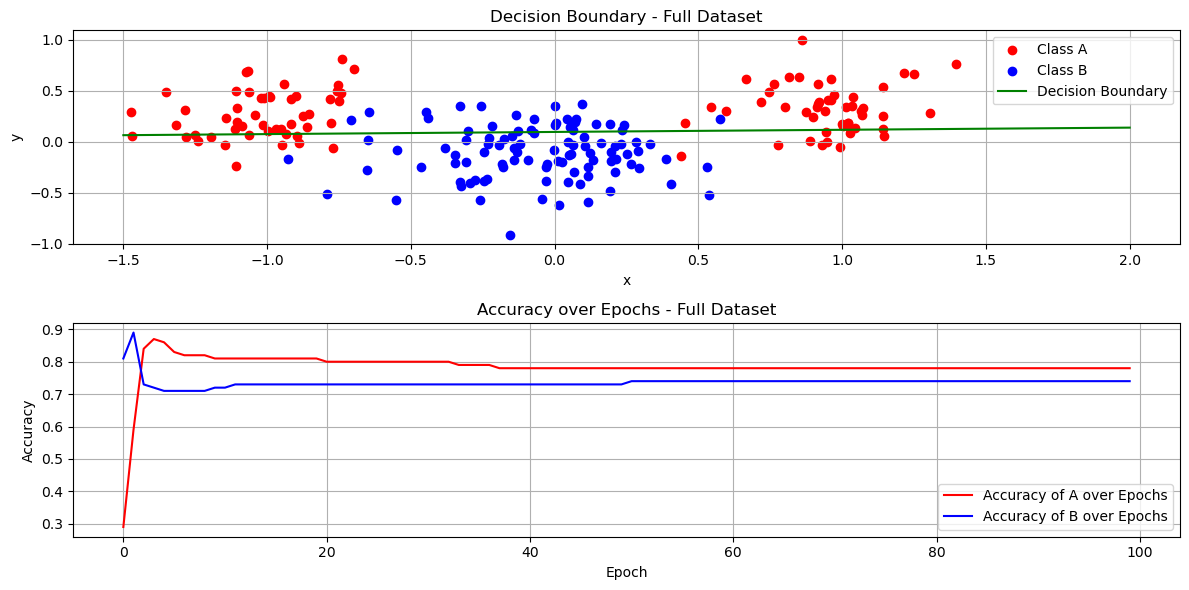

In [11]:
weights_0, A_accuracy_0, B_accuracy_0 = delta_model_batch_accuracy(data, labels, epoch, learning_rate)

plt.figure(figsize=(12, 6))
plt.subplot(2, 1, 1)
classA = data[:, labels == 1]
classB = data[:, labels == -1]
plt.scatter(classA[0, :], classA[1, :], color='r', label='Class A')
plt.scatter(classB[0, :], classB[1, :], color='b', label='Class B')
x = np.linspace(-1.5, 2, 100)
y = -(weights_0[0] * x + weights_0[2]) / weights_0[1]
plt.plot(x, y, 'g-', label='Decision Boundary')
plt.title("Decision Boundary - Full Dataset")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(range(len(A_accuracy_0)), A_accuracy_0, label='Accuracy of A over Epochs', color='r')
plt.plot(range(len(B_accuracy_0)), B_accuracy_0, label='Accuracy of B over Epochs', c='b')
plt.title("Accuracy over Epochs - Full Dataset")
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## subsampled data

Class B Accuracy: [0.08, 0.28, 0.44, 0.51, 0.58, 0.65, 0.67, 0.67, 0.68, 0.7, 0.71, 0.71, 0.72, 0.72, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.73, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.74, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75, 0.75]


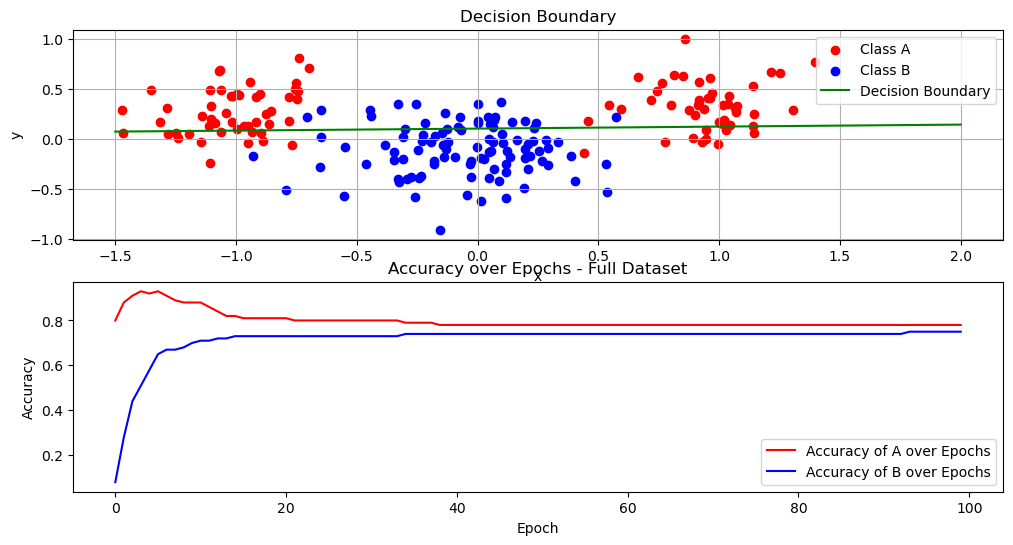

Class B Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94]


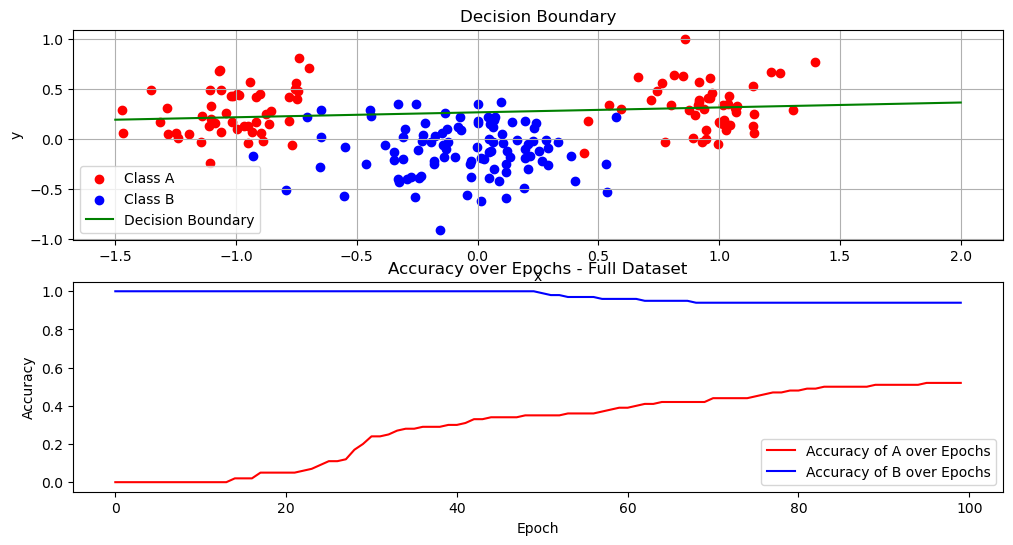

Class B Accuracy: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.05, 0.07, 0.07, 0.07, 0.09, 0.09, 0.1, 0.1, 0.13, 0.16, 0.19, 0.19, 0.19, 0.19, 0.2, 0.2, 0.2, 0.22, 0.23, 0.23, 0.23, 0.23, 0.24, 0.27, 0.28, 0.29, 0.29, 0.3, 0.31, 0.31, 0.34, 0.34, 0.35, 0.35, 0.36, 0.39, 0.4, 0.41, 0.41, 0.41, 0.42, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.43, 0.44, 0.44, 0.45, 0.45, 0.46, 0.46, 0.47, 0.48, 0.48, 0.48, 0.48, 0.48, 0.49, 0.49, 0.49, 0.51, 0.51, 0.51, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.53, 0.53, 0.53, 0.53, 0.54]


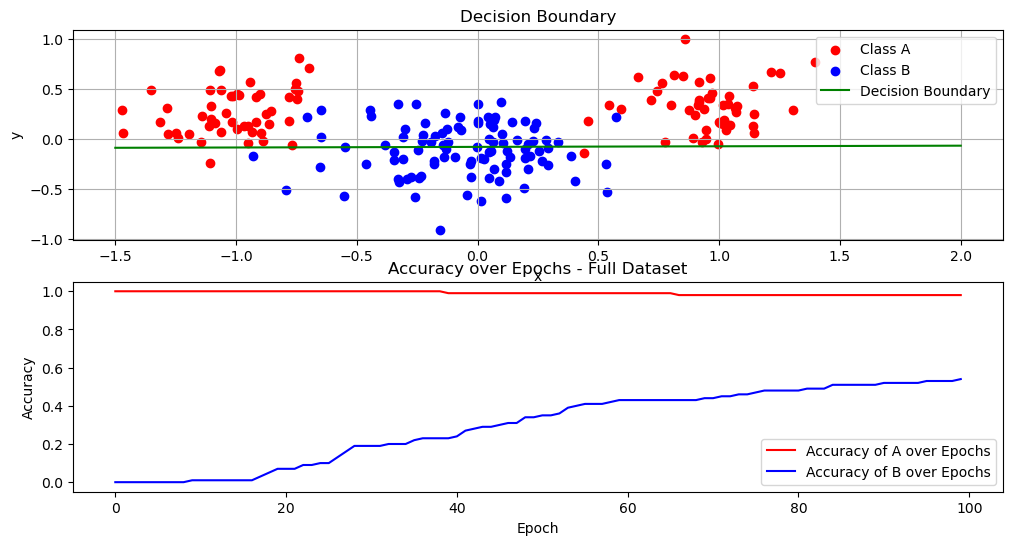

Class B Accuracy: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.99, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.98, 0.97, 0.97, 0.97, 0.97, 0.97, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.96, 0.95, 0.95, 0.95, 0.95, 0.95, 0.95, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94, 0.94]


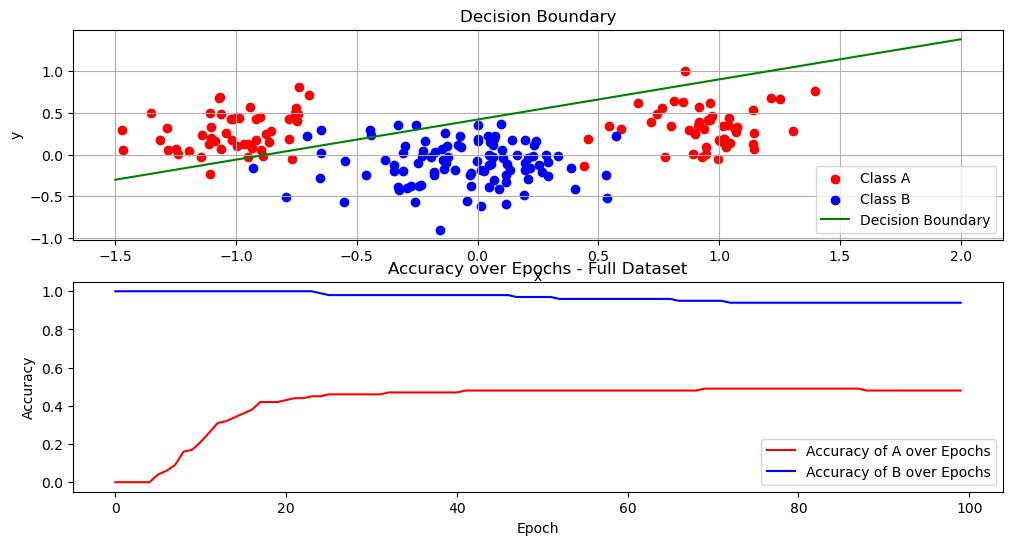

In [12]:
N = 4
n = 100
for i in range(N):
    if i == 0:  # case 1 : remove 25% from each class randomly
        a_indice = np.random.choice(n, size=int(0.75 * n), replace=False)
        b_indice = np.random.choice(n, size=int(0.75 * n), replace=False)
    elif i == 1:  # case 2 : only remove 50% randomly from classA
        a_indice = np.random.choice(n, size=int(0.5 * n), replace=False)
        b_indice = np.arange(n)
    elif i == 2:  # case 3 : only remove 50% randomly from classB
        a_indice = np.arange(n)
        b_indice = np.random.choice(n, size=int(0.5 * n), replace=False)
    elif i == 3:  # case 4
        minus = np.where(data[0, :n] < 0)[0]
        posits = np.where(data[0, :n] > 0)[0]
        a_indice = np.concatenate((
            np.random.choice(minus, size=int(0.8 * len(minus)), replace=False),
            np.random.choice(posits, size=int(0.2 * len(posits)), replace=False)
        ))
        b_indice = np.arange(n)
    
    indices = np.concatenate((a_indice, b_indice + n))
    selected_data = data[:, indices]
    selected_labels = labels[indices]


    weights, A_accuracy_list, B_accuracy_list = delta_model_batch_accuracy(selected_data, selected_labels, epoch, learning_rate, data, labels)
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 1, 1)
    classA = data[:, labels == 1]
    classB = data[:, labels == -1]
    plt.scatter(classA[0, :], classA[1, :], color='r', label='Class A')
    plt.scatter(classB[0, :], classB[1, :], color='b', label='Class B')
    x = np.linspace(-1.5, 2, 100)
    y = -(weights[0] * x + weights[2]) / weights[1]
    plt.plot(x, y, 'g-', label='Decision Boundary')
    plt.title("Decision Boundary")
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.grid(True)
    
    print("Class B Accuracy:", B_accuracy_list)

    plt.subplot(2, 1, 2)
    plt.plot(range(len(A_accuracy_list)), A_accuracy_list, label='Accuracy of A over Epochs', color='r')
    plt.plot(range(len(B_accuracy_list)), B_accuracy_list, label='Accuracy of B over Epochs', color='b')
    plt.title("Accuracy over Epochs - Full Dataset")
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    # plt.grid(True)
    plt.legend()
    plt.show()
